In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import json5
#!pip install chompjs
import chompjs
import numpy as np

In [37]:
xx= '["a","b"]'
#xx = '["a","b",null,null,"e"]'
json5.loads(xx)

['a', 'b']

In [47]:
import json

with open('halflife.txt') as f:
    #d = json.load(f)
    #print(d)
    t = f.read()
    
halflife_data = chompjs.parse_js_object(t)

In [49]:
halflife_data['1']

{'2': 388781328,
 '3': None,
 '4': 8.60826e-23,
 '5': 2.94347e-22,
 '6': 5.06931e-21}

In [50]:
df = pd.read_csv('./Bindungsenergie_all.csv')

In [51]:
df.columns

Index(['A', 'Z', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], dtype='object')

In [63]:
for id, row in df.iterrows():
    a= str(row.A)
    z= str(row.Z)
    
    try:
        print(z, a, halflife_data[z][a])
        hf = halflife_data[z][a]
    except:
        hf = np.nan
        
    df.loc[id, 'halflife'] = hf

1 2 388781328
1 3 None
2 3 7.04071e-22
1 4 8.60826e-23
2 4 0.8067
1 5 2.94347e-22
2 5 3.04158e-21
3 5 0.8399
1 6 5.06931e-21
2 6 0.1191
3 6 0.1783
4 6 47651000000000.0
2 7 None
3 7 None
4 7 13.76
5 7 0.0202
2 8 1.52079e-21
3 8 0.00875
4 8 0.02146
5 8 0.01733
6 8 179874000000.0
3 9 None
4 9 2.7e-21
5 9 0.0125
6 9 2.449
4 10 0.00435
5 10 0.00993
6 10 0.747
7 10 4.173
4 11 7.86617e-22
5 11 4.56238e-21
6 11 0.193
7 11 0.619
4 12 5.70297e-22
5 12 0.00508
6 12 0.092
7 12 0.336
8 12 13.51
5 13 None
6 13 0.0463
7 13 0.1344
8 13 3.42
5 14 0.00292
6 14 0.0163
7 14 0.084
8 14 2.25
5 15 9.12475e-22
7 15 0.023
8 15 0.097
9 15 0.39
5 16 7.60396e-22
6 16 0.0061
7 16 0.0141
8 16 0.065
9 16 0.08
10 16 0.197
7 17 5.2e-08
8 17 None
9 17 0.0082
10 17 0.0315
8 18 4.5e-12
9 18 0.005
10 18 0.02
11 18 0.0441
9 19 4.6e-20
10 19 0.015
11 19 0.048
12 19 0.236
9 20 0.0025
10 20 0.0073
11 20 0.01735
12 20 0.086
9 21 None
10 21 0.0034
11 21 0.0132
12 21 0.0905
9 22 2.6e-07
10 22 0.0035
11 22 0.008
12 22 0.02
10 23 

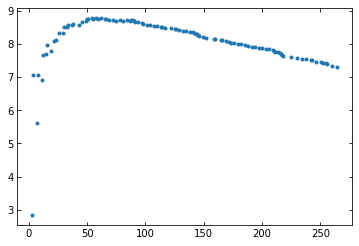

In [34]:
maxs = []
for z, dfz in df.groupby('Z'):
    id = dfz['Unnamed: 5'].idxmax()
    #print(dfz.loc[id])
    dfmax = dfz.loc[id]
    maxs.append(dfmax.T)
    #plt.plot(dfmax.A, dfmax['Unnamed: 5'],'.')
    #print(z, dfz['Unnamed: 5'].idxmax())
    
    
df_iso = pd.concat(maxs,axis=1).T

plt.plot(df_iso.A, df_iso['Unnamed: 5'],'.')

df_iso.to_csv('bindungsenergie_stabil.csv', index=False)

In [65]:
df.to_csv('test.txt')

In [33]:
df_iso.T

,A,Z,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
2,3,1,3H,2808.921,8.482,2.827
5,4,2,4He,3727.379,28.296,7.074
15,7,3,7Li,6533.833,39.244,5.606
20,8,4,8Be,7454.85,56.5,7.062
36,11,5,11B,10252.547,76.205,6.928
...,...,...,...,...,...,...
2213,255,101,255Md,237564.205,1894.327,7.429
2203,252,102,252No,234767.25,1871.293,7.426
2218,256,104,256Rf,238503.559,1890.659,7.385
2223,260,106,260Sg,242240.857,1909.035,7.342


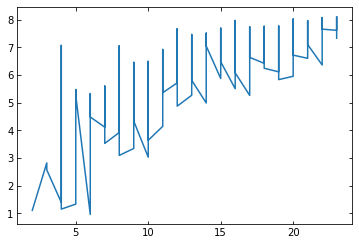

In [15]:
idx = df.groupby('Z').max('Unnamed: 5').index


dff=df.iloc[idx]

plt.plot(dff.A, dff['Unnamed: 5'])

In [16]:
dff

,A,Z,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
1,2,1,2H,1875.613,2.225,1.112
2,3,1,3H,2808.921,8.482,2.827
3,3,2,3He,2808.391,7.718,2.573
4,4,1,4H,3751.365,5.603,1.401
5,4,2,4He,3727.379,28.296,7.074
...,...,...,...,...,...,...
101,22,11,22Na,20482.065,174.146,7.916
102,22,12,22Mg,20486.339,168.578,7.663
104,23,9,23F,21423.093,175.269,7.620
106,23,11,23Na,21409.211,186.564,8.111


In [27]:
for a, dfa in df.groupby('A'):
    print(a, dfa['Unnamed: 5'].max())

1 0.0
2 1.112
3 2.827
4 7.074
5 5.48
6 5.332
7 5.606
8 7.062
9 6.463
10 6.498
11 6.928
12 7.68
13 7.47
14 7.52
15 7.699
16 7.976
17 7.751
18 7.767
19 7.779
20 8.032
21 7.972
22 8.08
23 8.111
24 8.261
25 8.224
26 8.334
27 8.332
28 8.448
29 8.449
30 8.521
31 8.481
32 8.493
33 8.514
34 8.584
35 8.538
36 8.575
37 8.57
38 8.614
39 8.563
40 8.595
41 8.576
42 8.617
43 8.601
44 8.658
45 8.631
46 8.669
47 8.665
48 8.723
49 8.711
50 8.756
51 8.742
52 8.776
53 8.76
54 8.778
55 8.765
56 8.79
57 8.77
58 8.792
59 8.768
60 8.781
61 8.765
62 8.795
63 8.763
64 8.777
65 8.757
66 8.76
67 8.737
68 8.756
69 8.725
70 8.73
71 8.718
72 8.732
73 8.705
74 8.725
75 8.701
76 8.711
77 8.696
78 8.718
79 8.696
80 8.711
81 8.696
82 8.711
83 8.696
84 8.717
85 8.699
86 8.712
87 8.711
88 8.733
89 8.714
90 8.71
91 8.693
92 8.693
93 8.672
94 8.667
95 8.649
96 8.654
97 8.635
98 8.635
99 8.614
100 8.619
101 8.601
102 8.607
103 8.584
104 8.587
105 8.573
106 8.58
107 8.561
108 8.567
109 8.548
110 8.551
111 8.537
112 8.545
113

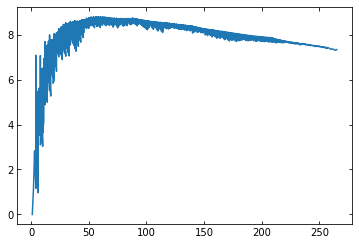

In [5]:
plt.plot(df.A, df['Unnamed: 5'])

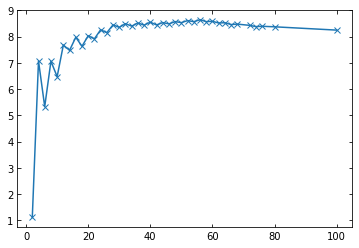

In [14]:
df_= df[df.A==2*df.Z]
plt.plot(df_.A, df_['Unnamed: 5'],'x-')

In [57]:
df = pd.read_csv('bindungsenergie.csv')
df = df.sort_values('A')



<IPython.core.display.Javascript object>


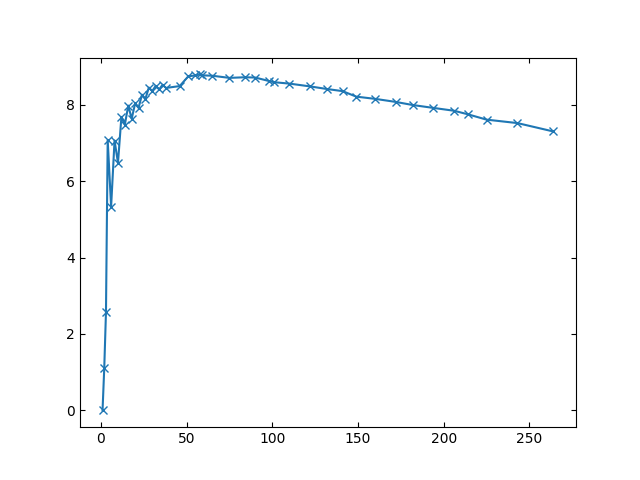

In [59]:
%matplotlib notebook
plt.plot(df.A, df.Bindungsenergie_pro_Nukleon_MeV, 'x-')

In [47]:
df

,A,Z,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,2,1,2H,1875.613,2.225,1.112
1,3,2,3He,2808.391,7.718,2.573
2,4,2,4He,3727.379,28.296,7.074
3,6,3,6Li,5601.518,31.994,5.332
4,8,4,8Be,7454.850,56.500,7.062
5,10,5,10B,9324.436,64.751,6.475
6,12,6,12C,11174.862,92.162,7.680
7,14,7,14N,13040.203,104.659,7.476
8,16,8,16O,14895.079,127.619,7.976
9,18,9,18F,16763.167,137.369,7.632
